In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/hdf_dataset.csv", index_col="date_heure", parse_dates = True)


df.index = pd.to_datetime(df.index, utc=True)

In [3]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## 1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

<AxesSubplot: xlabel='date_heure'>

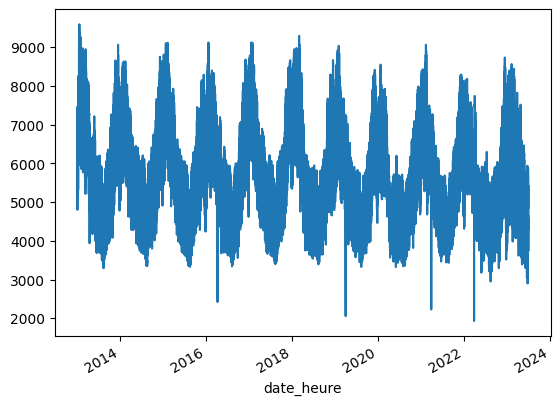

In [4]:
df["consommation_brute_electricite_rte"].plot()

## 2. Affichez cette même série temporelle en rassemblant:

### Par année

<AxesSubplot: xlabel='date_heure'>

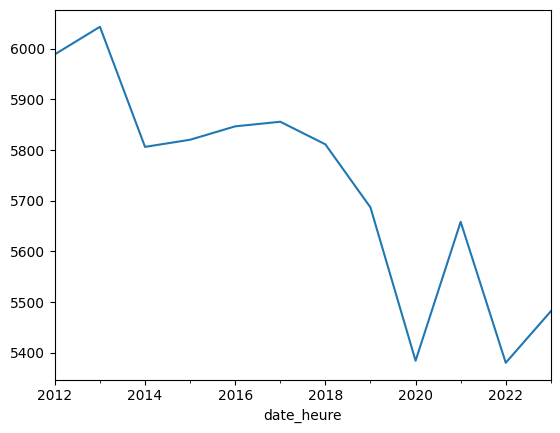

In [5]:
df["consommation_brute_electricite_rte"].resample("Y").mean().plot()

### par trimester:

<AxesSubplot: xlabel='date_heure'>

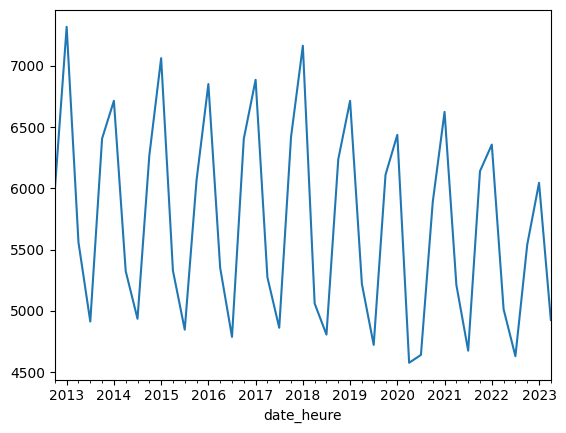

In [6]:
df["consommation_brute_electricite_rte"].resample("Q").mean().plot()

### Par mois

<AxesSubplot: xlabel='date_heure'>

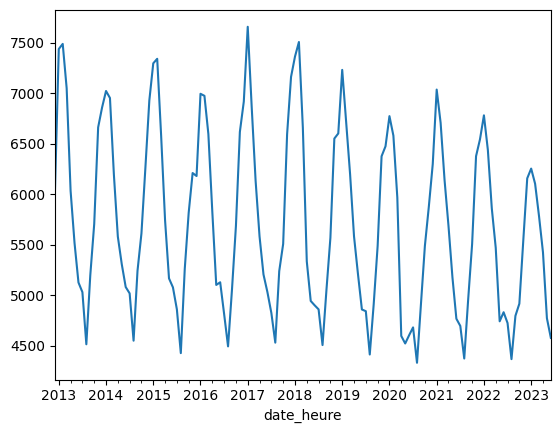

In [7]:
df["consommation_brute_electricite_rte"].resample("M").mean().plot()

### Par semaine

<AxesSubplot: xlabel='date_heure'>

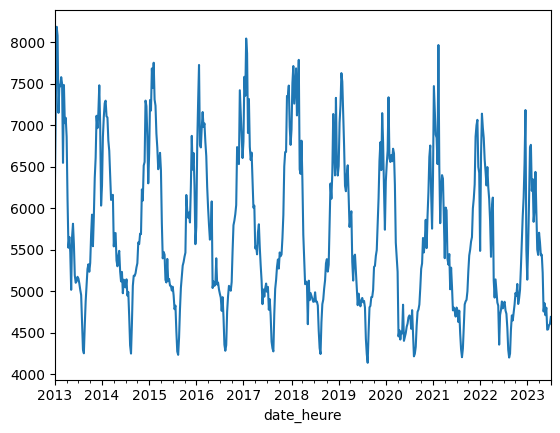

In [8]:
df["consommation_brute_electricite_rte"].resample("W").mean().plot()

### Par jour

<AxesSubplot: xlabel='date_heure'>

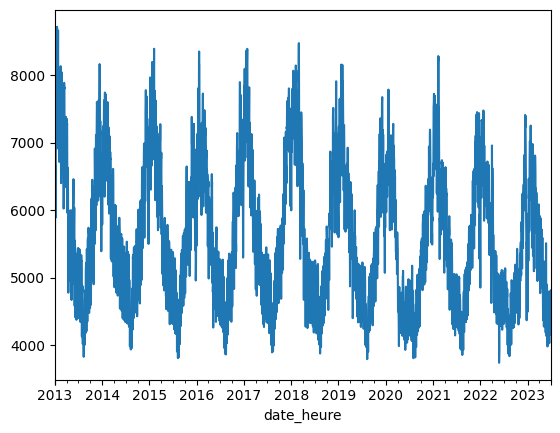

In [9]:
df["consommation_brute_electricite_rte"].resample("D").mean().plot()

In [10]:
df["consommation_brute_electricite_rte"].resample("D").mean().to_csv("data/hdf_daily.csv")

In [11]:
df_day = df["consommation_brute_electricite_rte"].resample("D").mean()

In [12]:
df_day.head()

date_heure
2012-12-31 00:00:00+00:00    5989.000000
2013-01-01 00:00:00+00:00    5412.687500
2013-01-02 00:00:00+00:00    6450.125000
2013-01-03 00:00:00+00:00    6668.416667
2013-01-04 00:00:00+00:00    6667.354167
Freq: D, Name: consommation_brute_electricite_rte, dtype: float64

### 3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

<AxesSubplot: xlabel='date_heure'>

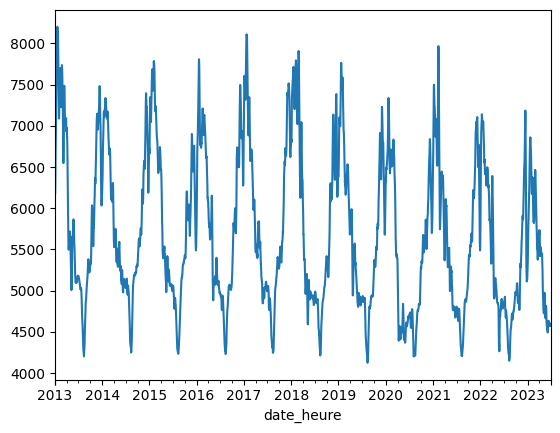

In [13]:
df_day.rolling(window=7,center=True, win_type=None).mean().plot()

## 4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

L'agrégation diminue le nombre de point en regroupant alors que la moyenne mobile garde le nombre de point inchangé.
La moyenne mobile a pour effet de:
- lisser la série temporelle
- enlever la saisonnalité

## 5. A l’aide de box-plots, observez la saisonnalité:

In [14]:
df_day = df_day.to_frame()

In [15]:
df_day['date'] = df_day.index

In [16]:
# Extract year, quarter, month, and day of the week
df_day['year'] = df_day['date'].dt.year
df_day['quarter'] = df_day['date'].dt.quarter
df_day['month'] = df_day['date'].dt.strftime('%b')
df_day['day_of_week'] = df_day['date'].dt.strftime('%A')



In [17]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour

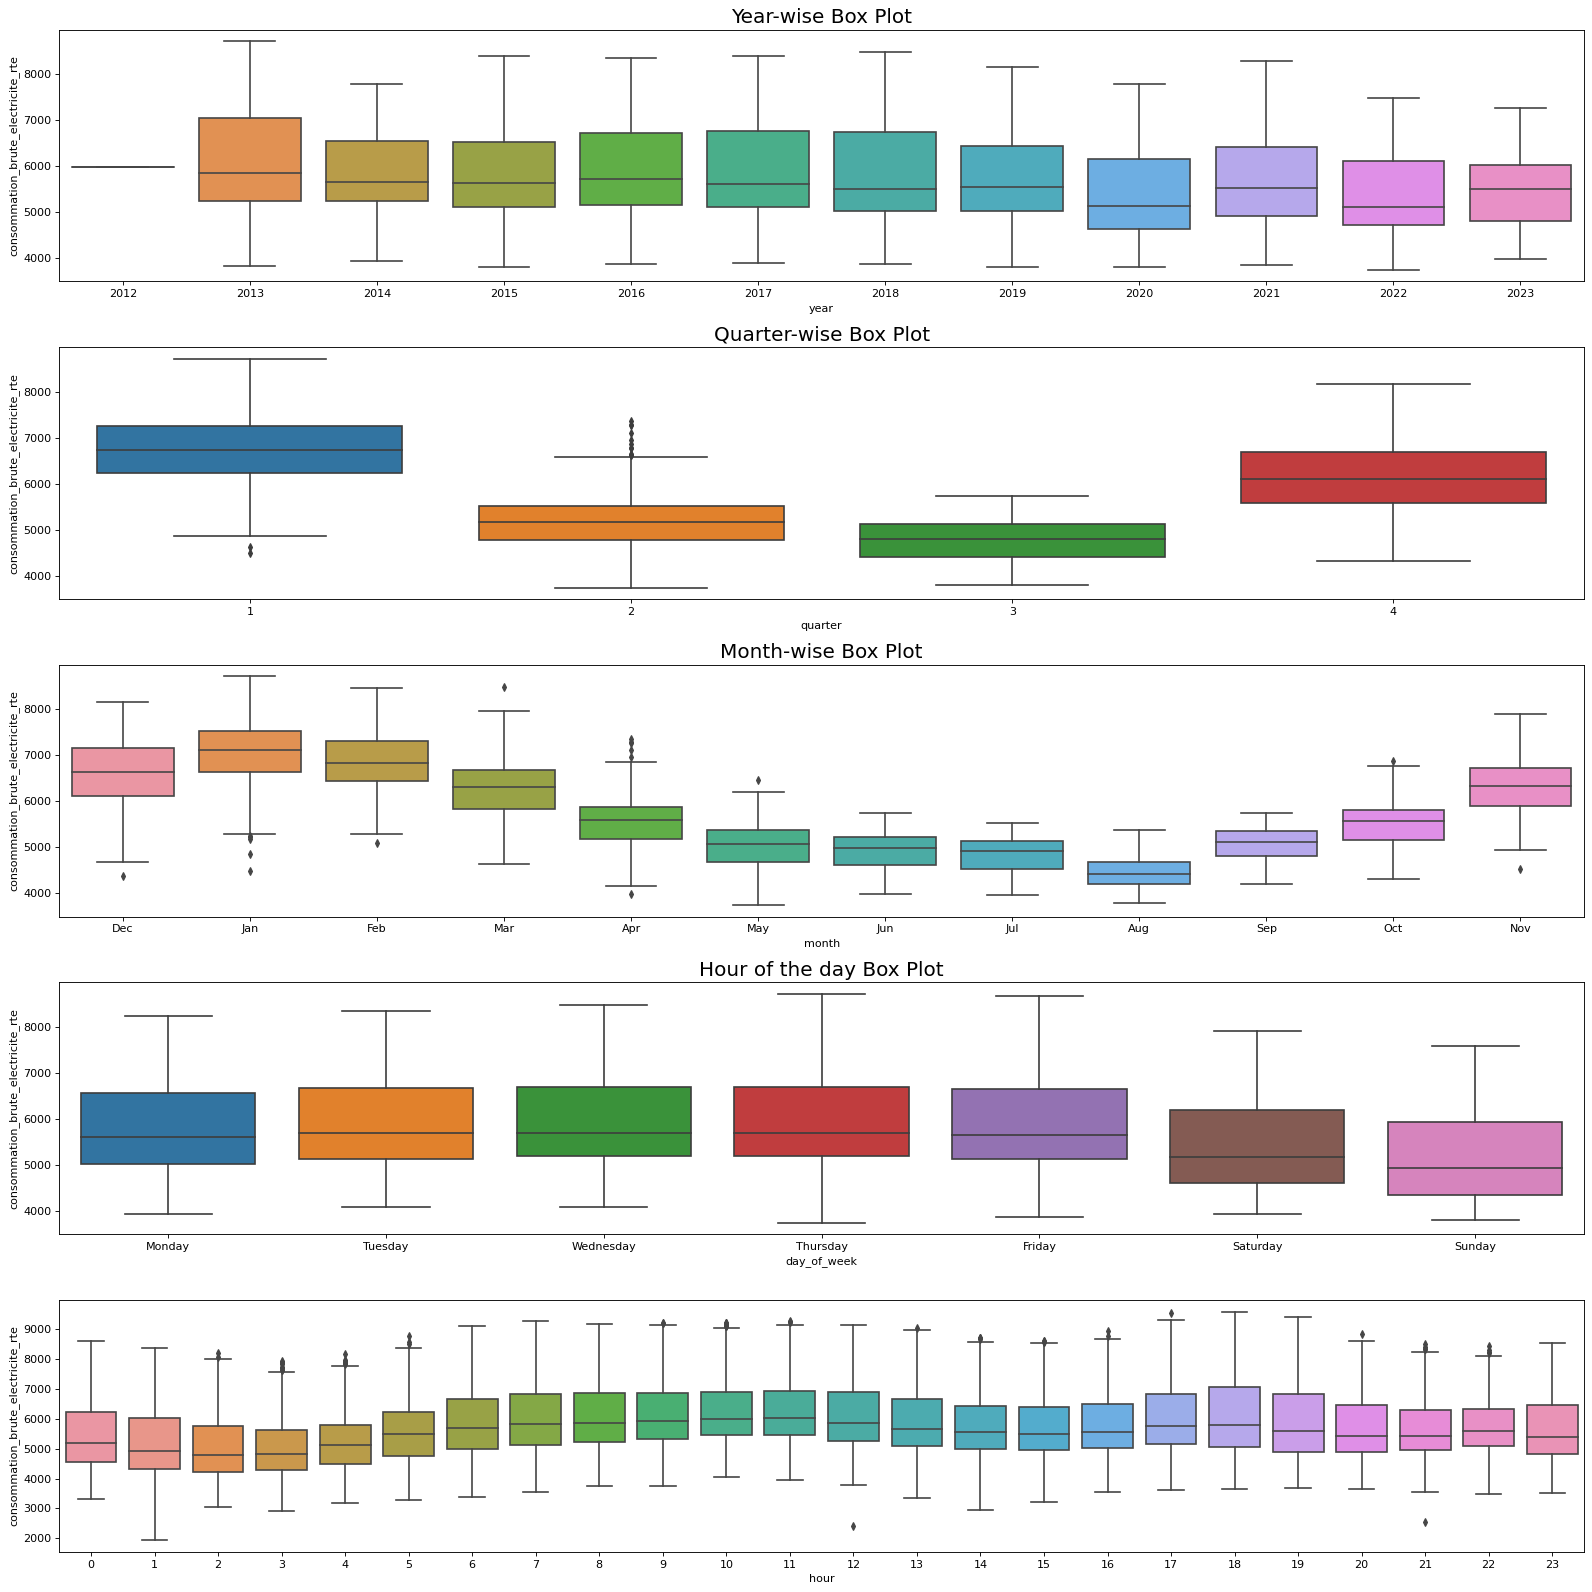

In [18]:
# Draw Box Plots for each category
fig, axes = plt.subplots(5, 1, figsize=(20, 20), dpi=80)

# Year-wise Box Plot
sns.boxplot(x='year', y='consommation_brute_electricite_rte', data=df_day, ax=axes[0])
axes[0].set_title('Year-wise Box Plot', fontsize=18)

# Quarter-wise Box Plot
sns.boxplot(x='quarter', y='consommation_brute_electricite_rte', data=df_day, ax=axes[1])
axes[1].set_title('Quarter-wise Box Plot', fontsize=18)

# Month-wise Box Plot
sns.boxplot(x='month', y='consommation_brute_electricite_rte', data=df_day, ax=axes[2])
axes[2].set_title('Month-wise Box Plot', fontsize=18)

# Day of the Week-wise Box Plot
sns.boxplot(x='day_of_week', y='consommation_brute_electricite_rte', data=df_day, ax=axes[3])
axes[3].set_title('Day of the Week-wise Box Plot', fontsize=18)

# Hour of the Day  Box Plot
sns.boxplot(x='hour', y='consommation_brute_electricite_rte', data=df, ax=axes[4])
axes[3].set_title('Hour of the day Box Plot', fontsize=18)

plt.tight_layout()
plt.show()

## 6. Qu’est ce que la stationnarité? 

**`Processus Stationnaire`**: Un processus est (faiblement) stationnaire si son espérance et ses autocovariances sont invariantes par translation dans le temps (Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.) 

En français, peu importe quand on le regarde, il tourne toujours autour de la même moyenne avec des variations similaires (donc pas de saisonalité et pas de tendance)

## 7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 

Pour la tendance ce n'est pas évident, par contre très forte saisonalité donc forcément non stationnaire.

## 8. Dickey Fuller. Non désaisonnalisé

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

In [20]:
df_day = pd.read_csv("data/hdf_daily.csv", index_col="date_heure", parse_dates = True)
df_day.index = pd.to_datetime(df_day.index, utc=True)

In [21]:
# ADF Test
result = adfuller(df_day["consommation_brute_electricite_rte"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.236425652702574
p-value: 0.0005713466895179834
Critial Values:
   1%, -3.432070672988693
Critial Values:
   5%, -2.8623002987378547
Critial Values:
   10%, -2.567174716967499


adfuller
H0: the time series possesses a unit root and is non-stationary.  
H1: Time series is stationnary


D'après le test adfuller la série est stationnaire

## 9. KPSS. Non désaisonnalisé

In [22]:
# KPSS Test
result = kpss(df_day["consommation_brute_electricite_rte"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.493417
p-value: 0.043149
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Le test est cohérent, il est difficile de rejeter ici l'hypothèse nulle d'une stationnarité autour d'un trend.

## 10. Dickey Fuller.  désaisonnalisé

<AxesSubplot: xlabel='date_heure'>

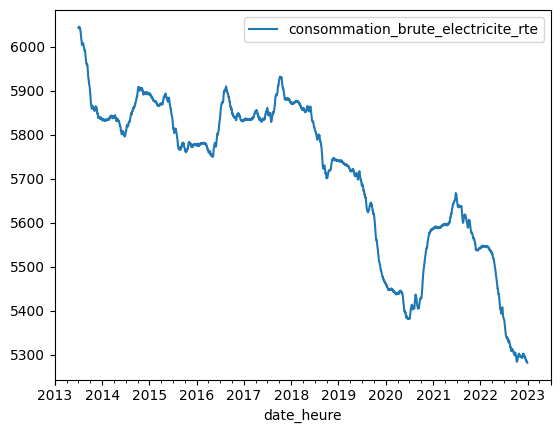

In [23]:
df_day.rolling(window=365,center=True, win_type=None).mean().plot()

In [24]:
df_rolling_year = df_day.rolling(window=365,center=True, win_type=None).mean()
df_rolling_year = df_rolling_year[~df_rolling_year["consommation_brute_electricite_rte"].isna()]

In [25]:
df_rolling_year

,consommation_brute_electricite_rte
date_heure,
2013-07-01 00:00:00+00:00,6042.525853
2013-07-02 00:00:00+00:00,6043.187269
2013-07-03 00:00:00+00:00,6044.223342
2013-07-04 00:00:00+00:00,6043.786641
2013-07-05 00:00:00+00:00,6043.454392
...,...
2022-12-26 00:00:00+00:00,5284.278802
2022-12-27 00:00:00+00:00,5283.580115
2022-12-28 00:00:00+00:00,5282.859738


In [26]:
# ADF Test
result = adfuller(df_rolling_year["consommation_brute_electricite_rte"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.4819697483652551
p-value: 0.8954872138996028
Critial Values:
   1%, -3.4322523797568776
Critial Values:
   5%, -2.862380562266727
Critial Values:
   10%, -2.567217446677258


Désaisonalisé a rendu la série non stationnaire.

## 10. KPSS sur désaisonnalisé

In [27]:
# KPSS Test
result = kpss(df_rolling_year["consommation_brute_electricite_rte"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 6.912275
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\impej\AppData\Local\Temp\ipykernel_15808\1158540780.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_rolling_year["consommation_brute_electricite_rte"], regression='c')


Même résultat avec KPSS, ce qui veut dire qu'elle n'est meme pas stationnaire autour d'un trend

On voit ici que les tests statistiques contre-disent notre intuition. C'est assez classique dans les séries temporelles. L'approche graphique est souvent la plus pertinente, il est évident ici qu'il existe une saisonnalité.

Le fait de ne pas pouvoir se fier aux tests est ce qui constitue la grande difficulté des time series, il est assez difficile d'automatiser les études. Il est souvent nécessaire de revenir à une approche graphique, ce qui prend du temps.

## 11. Additive, mutiplicative

 La série à tout l'air d'être additive. 